## Section 2. Data Understanding
### 2.1 Dataset Information

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # Pipeline jika melakukan balancing data

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling base learners
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# Max Column
pd.set_option('display.max_columns', None)

# Save Model
import joblib
import pickle

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, make_scorer, fbeta_score
from sklearn.model_selection import learning_curve

# Model Interpretation
import shap
import lime

# MSNO
import missingno as msno

# VIF Checker
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add Constant for VIF
import statsmodels.api as sm

from scipy.stats import spearmanr

In [28]:
df = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut adalah penjelasan untuk masing-masing kolom:

<table>
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Definisi</th>
            <th>Value dan Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>customerID</b></td>
            <td>ID unik untuk setiap pelanggan.</td>
            <td><code>Teks alfanumerik</code>: Kode unik pengenal pelanggan.</td>
        </tr>
        <tr>
            <td><b>gender</b></td>
            <td>Jenis kelamin pelanggan.</td>
            <td><code>Male</code>: Laki-laki.<br><code>Female</code>: Perempuan.</td>
        </tr>
        <tr>
            <td><b>SeniorCitizen</b></td>
            <td>Bagaimanakah pelanggan seorang warga senior.</td>
            <td><code>1</code>: Ya, warga senior.<br><code>0</code>: Bukan warga senior.</td>
        </tr>
        <tr>
            <td><b>Partner</b></td>
            <td>Bagaimanakah pelanggan memiliki pasangan.</td>
            <td><code>Yes</code>: Punya pasangan.<br><code>No</code>: Tidak punya pasangan.</td>
        </tr>
        <tr>
            <td><b>Dependents</b></td>
            <td>Bagaimanakah pelanggan memiliki tanggungan.</td>
            <td><code>Yes</code>: Punya tanggungan.<br><code>No</code>: Tidak punya tanggungan.</td>
        </tr>
        <tr>
            <td><b>tenure</b></td>
            <td>Lama berlangganan dalam bulan.</td>
            <td><code>Numerik</code>: Jumlah bulan pelanggan bersama perusahaan.</td>
        </tr>
        <tr>
            <td><b>Contract</b></td>
            <td>Jenis kontrak berlangganan.</td>
            <td><code>Month-to-month</code>: Kontrak bulanan.<br><code>One year</code>: Kontrak satu tahun.<br><code>Two year</code>: Kontrak dua tahun.</td>
        </tr>
        <tr>
            <td><b>PaperlessBilling</b></td>
            <td>Menggunakan tagihan elektronik.</td>
            <td><code>Yes</code>: Tagihan via email.<br><code>No</code>: Tagihan fisik.</td>
        </tr>
        <tr>
            <td><b>PaymentMethod</b></td>
            <td>Metode pembayaran yang digunakan.</td>
            <td><code>Electronic check</code>: Pembayaran dengan cek elektronik.<br><code>Mailed check</code>: Pembayaran dengan mengirimkan cek fisik.<br><code>Bank transfer (automatic)</code>: Pembayaran melalui transfer bank otomatis.<br><code>Credit card (automatic)</code>: Pembayaran melalui kartu kredit otomatis.</td>
        </tr>
        <tr>
            <td><b>MonthlyCharges</b></td>
            <td>Tagihan setiap bulan.</td>
            <td><code>Numerik Desimal</code>: Total biaya bulanan untuk semua layanan.</td>
        </tr>
        <tr>
            <td><b>TotalCharges</b></td>
            <td>Total tagihan selama berlangganan.</td>
            <td><code>Numerik Desimal</code>: Akumulasi semua tagihan bulanan.</td>
        </tr>
        <tr>
            <td><b>PhoneService</b></td>
            <td>Bagaimanakah pelanggan punya layanan telepon.</td>
            <td><code>Yes</code>: Punya layanan telepon.<br><code>No</code>: Tidak punya.</td>
        </tr>
        <tr>
            <td><b>MultipleLines</b></td>
            <td>Bagaimanakah punya lebih dari satu saluran telepon.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Punya telepon, tapi hanya 1 saluran.<br><code>No phone service</code>: Tidak punya layanan telepon.</td>
        </tr>
        <tr>
            <td><b>InternetService</b></td>
            <td>Tipe layanan internet pelanggan.</td>
            <td><code>DSL</code>: Layanan internet melalui jalur telepon standar.<br><code>Fiber optic</code>: Layanan internet berkecepatan tinggi melalui kabel fiber optik.<br><code>No</code>: Tidak berlangganan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineSecurity</b></td>
            <td>Bagaimanakah punya layanan keamanan online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineBackup</b></td>
            <td>Bagaimanakah punya layanan backup online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>DeviceProtection</b></td>
            <td>Bagaimanakah punya proteksi perangkat.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>TechSupport</b></td>
            <td>Bagaimanakah punya dukungan teknis premium.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingTV</b></td>
            <td>Bagaimanakah streaming TV dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingMovies</b></td>
            <td>Bagaimanakah streaming film dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>Churn</b></td>
            <td><b>(Target)</b> Bagaimanakah pelanggan berhenti.</td>
            <td><code>Yes</code>: Pelanggan berhenti berlangganan.<br><code>No</code>: Pelanggan masih aktif.</td>
        </tr>
    </tbody>
</table>

### 2.2 Missing Values Checking

In [29]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Meskipun tidak terdapat missing values secara eksplisit dalam dataset, keberadaan nilai `tenure = 0` perlu diperhatikan karena dapat merepresentasikan pelanggan yang baru mendaftar dan belum benar-benar aktif, atau langsung churn pada bulan pertama. Hal ini penting karena bisa mempengaruhi kualitas data dan performa model machine learning, terutama jika jumlahnya kecil namun berdampak besar dalam proses pembelajaran model. Dari sisi bisnis, pelanggan dengan `tenure = 0` mungkin belum sempat menggunakan layanan secara penuh, sehingga berpotensi mencerminkan signup palsu atau pembatalan instan. Oleh karena itu, baris dengan nilai ini sebaiknya dianalisis lebih lanjut, dipertimbangkan untuk dipisahkan, atau bahkan dibuang jika tidak relevan.

In [30]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Dari tabel yang ditampilkan, terlihat bahwa seluruh baris dengan `tenure = 0` memiliki nilai `TotalCharges` yang kosong (missing). Ini memperkuat indikasi adanya **anomali data**, karena secara logika bisnis, jika seorang pelanggan sudah memiliki `MonthlyCharges` tetapi `TotalCharges` kosong, hal ini tidak konsisten. Seharusnya, meskipun pelanggan baru, `TotalCharges` minimal setara dengan `MonthlyCharges` jika telah berjalan satu bulan. Selain itu, sebagian besar pelanggan ini memiliki kontrak jangka panjang seperti "Two year", yang tidak wajar jika langsung berstatus tenure = 0 tanpa adanya tagihan. Temuan ini menunjukkan bahwa baris-baris tersebut kemungkinan merupakan data yang belum tereksekusi penuh dalam sistem atau input yang belum lengkap. Maka, penting untuk memperlakukan baris ini secara khusus—baik dengan membersihkan, memisahkan, atau mengecualikan dari pelatihan model tergantung pada tujuan analisisnya.


### 2.3 Dataset Filtering

In [31]:
df = df[df['tenure']!=0]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Terdapat anomali pada data dengan tenure = 0, di mana nilai TotalCharges tidak terisi. Hal ini wajar karena pelanggan tersebut baru bergabung sehingga belum memiliki tagihan dan status churn-nya belum dapat diketahui dengan jelas. Sesuai kesepakatan, 11 baris dengan tenure = 0 dihapus dari dataset karena dianggap tidak merepresentasikan perilaku pelanggan aktif. Data ini hanya mencakup sekitar 0.15% dari total, sehingga dampaknya terhadap analisis sangat kecil.

In [32]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [33]:
df_month = df[(df['Contract'] == 'Month-to-month') & (df['tenure'] >= 1)]
df_month.shape

(3875, 21)

In [34]:
df_oneyear = df[(df['Contract'] == 'One year') & (df['tenure'] >= 12)]
df_oneyear.shape

(1371, 21)

In [35]:
df_twoyear = df[(df['Contract'] == 'Two year') & (df['tenure'] >= 24)]
df_twoyear.shape

(1553, 21)

In [36]:
df = pd.concat([df_month, df_oneyear, df_twoyear], axis=0).reset_index().drop(columns = 'index')
df.shape

(6799, 21)

### 2.3 Duplicated Values Checking

In [37]:
df.duplicated().sum()

np.int64(0)

Hasil pemeriksaan duplikasi dengan fungsi `df.duplicated().sum()` menunjukkan bahwa tidak terdapat baris yang sama persis (duplikat) dalam dataset, yaitu sejumlah 0 baris duplikat. Hal ini menandakan bahwa setiap entri dalam data bersifat unik setelah penghapusan baris dengan `tenure = 0`, sehingga tidak diperlukan tindakan lebih lanjut terkait duplikasi. Keberadaan data yang bebas duplikasi sangat penting untuk menjaga kualitas analisis dan mencegah bias yang dapat muncul pada tahap pelatihan model machine learning.

### 2.4 Dataset Restructuring

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6799 non-null   object 
 1   gender            6799 non-null   object 
 2   SeniorCitizen     6799 non-null   int64  
 3   Partner           6799 non-null   object 
 4   Dependents        6799 non-null   object 
 5   tenure            6799 non-null   int64  
 6   PhoneService      6799 non-null   object 
 7   MultipleLines     6799 non-null   object 
 8   InternetService   6799 non-null   object 
 9   OnlineSecurity    6799 non-null   object 
 10  OnlineBackup      6799 non-null   object 
 11  DeviceProtection  6799 non-null   object 
 12  TechSupport       6799 non-null   object 
 13  StreamingTV       6799 non-null   object 
 14  StreamingMovies   6799 non-null   object 
 15  Contract          6799 non-null   object 
 16  PaperlessBilling  6799 non-null   object 


In [40]:
# Mengubah kolom tertentu menjadi tipe data kategorikal
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6799 non-null   object  
 1   gender            6799 non-null   category
 2   SeniorCitizen     6799 non-null   category
 3   Partner           6799 non-null   category
 4   Dependents        6799 non-null   category
 5   tenure            6799 non-null   int64   
 6   PhoneService      6799 non-null   category
 7   MultipleLines     6799 non-null   category
 8   InternetService   6799 non-null   category
 9   OnlineSecurity    6799 non-null   category
 10  OnlineBackup      6799 non-null   category
 11  DeviceProtection  6799 non-null   category
 12  TechSupport       6799 non-null   category
 13  StreamingTV       6799 non-null   category
 14  StreamingMovies   6799 non-null   category
 15  Contract          6799 non-null   category
 16  PaperlessBilling  6799 n

In [41]:
num_cols = ['MonthlyCharges', 'TotalCharges']
df[num_cols] = df[num_cols].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6799 non-null   object  
 1   gender            6799 non-null   category
 2   SeniorCitizen     6799 non-null   category
 3   Partner           6799 non-null   category
 4   Dependents        6799 non-null   category
 5   tenure            6799 non-null   int64   
 6   PhoneService      6799 non-null   category
 7   MultipleLines     6799 non-null   category
 8   InternetService   6799 non-null   category
 9   OnlineSecurity    6799 non-null   category
 10  OnlineBackup      6799 non-null   category
 11  DeviceProtection  6799 non-null   category
 12  TechSupport       6799 non-null   category
 13  StreamingTV       6799 non-null   category
 14  StreamingMovies   6799 non-null   category
 15  Contract          6799 non-null   category
 16  PaperlessBilling  6799 n

### 2.5 Exploratory Data Analysis (EDA)

In [46]:
# Mapping Target
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No':0})

In [47]:
# Mapping Column SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

np.float64(0.2582710349365836)

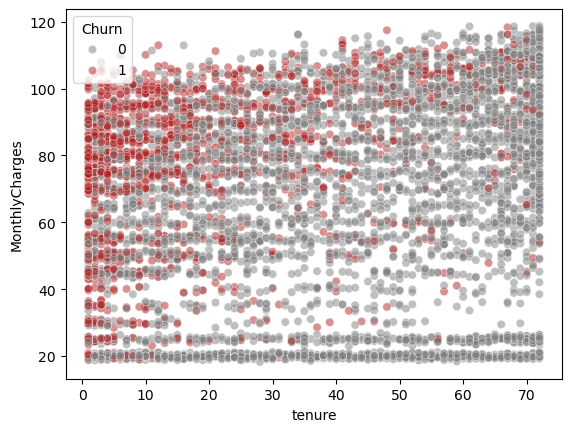

In [48]:
sns.scatterplot(data = df, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', palette={'gray', 'firebrick'}, alpha=0.5);
# Calculate the Spearman correlation between 'tenure' and 'MonthlyCharges'
spearman_corr, _ = spearmanr(df['tenure'], df['MonthlyCharges'])
spearman_corr

np.float64(0.8824933649156558)

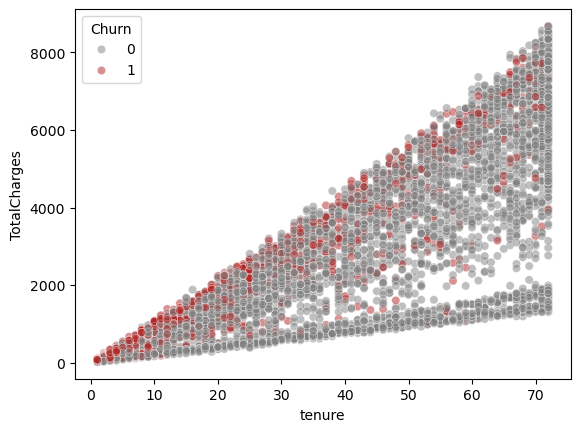

In [49]:
sns.scatterplot(data = df, x = 'tenure', y = 'TotalCharges', hue = 'Churn', palette={'gray', 'firebrick'}, alpha=0.5);
spearman_corr, _ = spearmanr(df['tenure'], df['TotalCharges'])
spearman_corr

np.float64(0.6305218026877161)

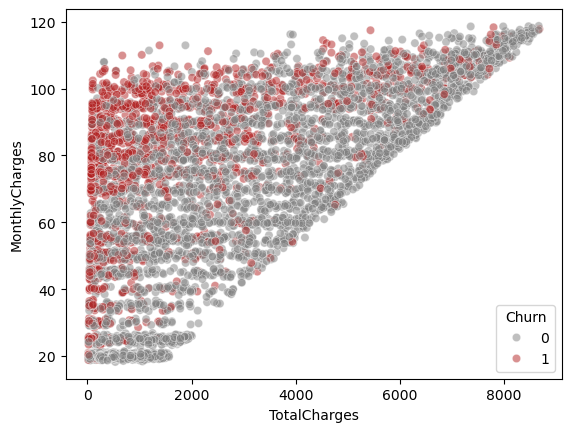

In [50]:
sns.scatterplot(data = df, x = 'TotalCharges', y = 'MonthlyCharges', hue = 'Churn', palette={'gray', 'firebrick'}, alpha=0.5);
spearman_corr, _ = spearmanr(df['TotalCharges'], df['MonthlyCharges'])
spearman_corr

## **Save Dataset**

In [51]:
df.to_csv('../Data/Telco_Churn_clean_dataset.csv')